In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.figure(figsize=[10, 8])

#plt.suptitle('Beschleinigungssensor LSM6DS0 Beispieldatensätze Bewegungen 1-6', y=1.05)

#plt.subplot(231)
data_all = np.genfromtxt("sorted_log.2024-08-22T23:20:00.212427.csv", delimiter=',')
#plt.plot(data_all[:,0], 'r',marker='.', label='x-axis')
#plt.plot(data_ruhelage[:,1], 'g', label='y-axis')
#plt.plot(data_ruhelage[:,2], 'b', label='z-axis')
#plt.legend()
#plt.legend(bbox_to_anchor=(1.85, 1), loc=9, borderaxespad=-7.0)
#plt.title('1')
#plt.xlabel('Samples')
#plt.ylabel('acceleration [mg]')

#plt.show()

<Figure size 1000x800 with 0 Axes>

In [ ]:
# IN,1,2,1852440846143583,0,F,1
#  0,  1  , 2  ,  3    ,   4   ,  5    ,  6
# IN,round,UID,arriTime,deqTime,prioQed,reqID
#
#
#
#
#


In [7]:
total_time_IN =  data_all[49,3] - data_all[0,3]
total_time_IN, data_all[49,3], data_all[0,3]

(27554667.0, 1852440873698250.0, 1852440846143583.0)

In [16]:
amount_intervalls = 10
time_intervall = total_time_IN / amount_intervalls
time_intervall

2755466.7

In [15]:
len_IN_part = 50
len_OUT_part = len(data_all) - len_IN_part
latest_arrvl = data_all[49,3]
latest_arrvl, len_OUT_part

(1852440873698250.0, 46)

In [60]:
latest_arrvl - (time_intervall * 8)


1852440851654516.5

In [62]:
#version 1. Not good because intervalls are not equidistant!!
arr0 = np.zeros([amount_intervalls])
arr1 = np.zeros([amount_intervalls])
arr2 = np.zeros([amount_intervalls])
lower_bound = data_all[0,3]
for k in range((amount_intervalls - 1), -1, -1):
    upper_bound = latest_arrvl - (time_intervall * k)
    for i in range(len_IN_part):
        time = data_all[i,3]  
        if lower_bound <= time <= upper_bound:
            match data_all[i,2]:
                case 0: 
                    arr0[9-k] = arr0[9-k] + 1
                case 1: 
                    arr1[9-k] = arr1[9-k] + 1
                case 2: 
                    arr2[9-k] = arr2[9-k] + 1
    lower_bound = upper_bound
    
arr0.sum(), arr1.sum(), arr2.sum(), arr0, arr1, arr2
        

(4.0,
 7.0,
 39.0,
 array([0., 0., 0., 1., 1., 0., 0., 1., 1., 0.]),
 array([0., 0., 0., 1., 1., 4., 0., 0., 0., 1.]),
 array([1., 0., 2., 4., 4., 3., 5., 6., 5., 9.]))

In [142]:
arr0 = np.zeros([amount_intervalls])
arr1 = np.zeros([amount_intervalls])
arr2 = np.zeros([amount_intervalls])
lower_bound = data_all[0,3]
for k in range(1,amount_intervalls+1):
    arr_idx = k-1
    upper_bound = data_all[((k*5)-1), 3]
    for i in range(len_IN_part+1):
        time = data_all[i,3]
        if lower_bound <= time < upper_bound:
            #print(lower_bound, time, upper_bound)
            match data_all[i,2]:
                case 0: 
                    arr0[arr_idx] = arr0[arr_idx] + 1
                    #print("0:",arr0)
                case 1: 
                    arr1[arr_idx] = arr1[arr_idx] + 1
                    #print("1:",arr1)
                case 2: 
                    arr2[arr_idx] = arr2[arr_idx] + 1
                    #print("2:",arr2)
    lower_bound = upper_bound
    #print("--------")
    
arr0.sum(), arr1.sum(), arr2.sum(), arr0, arr1, arr2
        

(4.0,
 7.0,
 39.0,
 array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0.]),
 array([1., 0., 1., 2., 2., 0., 0., 0., 0., 1.]),
 array([4., 4., 3., 3., 3., 4., 5., 4., 5., 4.]))

In [105]:
for k in range(amount_intervalls):
    print(k)

0
1
2
3
4
5
6
7
8
9


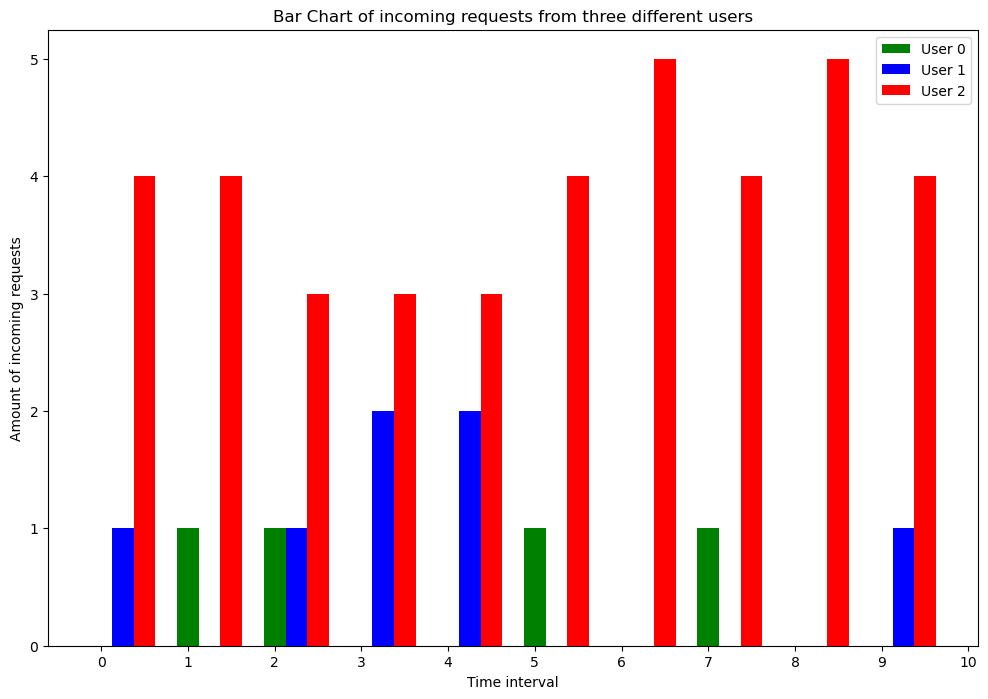

(array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0.]),
 array([1., 0., 1., 2., 2., 0., 0., 0., 0., 1.]),
 array([4., 4., 3., 3., 3., 4., 5., 4., 5., 4.]))

In [196]:
#plt.figure(figsize=[12, 8])
#hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#,arr1,arr2
#label=['User 0', 'User 1', 'User 2']
#plt.hist([arr0,arr1,arr2], bins=10, density=True, histtype='bar', label=['User 0', 'User 1', 'User 2'], alpha=0.7)
x = [1,2,3,4,5,6,7,8,9,10]
width=0.25
#alpha=0.5
ax = plt.figure(figsize=[12, 8])#plt.subplots(layout='constrained')
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
plt.xlabel('Time interval')
plt.ylabel('Amount of incoming requests')
plt.title('Bar Chart of incoming requests from three different users')
plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.show()

arr0, arr1, arr2



